# Phase 1: EEG Data Comprehension and Exploration

## Objective
Understand the structure, format, and characteristics of the Alcoholics EEG dataset to prepare for synthetic data generation.

## Dataset Information
- Source: Kaggle - Alcoholics EEG Dataset (nnair25/Alcoholics)
- Application: Will be used to develop methods applicable to cocaine craving EEG analysis
- Training files: 469
- Test files: 481

In [1]:
import kagglehub

path = kagglehub.dataset_download("nnair25/Alcoholics")

print("Path to dataset files:", path)

Path to dataset files: /Users/jacksonzhao/.cache/kagglehub/datasets/nnair25/Alcoholics/versions/1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

# Data path - using relative path for portability
DATA_PATH = Path.home() / '.cache/kagglehub/datasets/nnair25/Alcoholics/versions/1'
TRAIN_PATH = DATA_PATH / 'SMNI_CMI_TRAIN'
TEST_PATH = DATA_PATH / 'SMNI_CMI_TEST'

print(f"Data directory exists: {DATA_PATH.exists()}")
print(f"Training directory exists: {TRAIN_PATH.exists()}")
print(f"Test directory exists: {TEST_PATH.exists()}")


Data directory exists: True
Training directory exists: True
Test directory exists: True


## 1. Load and Inspect Sample Data


In [3]:
# Load first few files to understand structure
train_files = sorted(list(TRAIN_PATH.glob('*.csv')))
test_files = sorted(list(TEST_PATH.glob('*.csv')))

print(f"Total training files: {len(train_files)}")
print(f"Total test files: {len(test_files)}")
print(f"\nFirst 5 training files:")
for f in train_files[:5]:
    print(f"  - {f.name}")

Total training files: 468
Total test files: 480

First 5 training files:
  - Data1.csv
  - Data10.csv
  - Data100.csv
  - Data101.csv
  - Data102.csv


In [4]:
# Load first file
sample_df = pd.read_csv(train_files[0])
print(f"Shape: {sample_df.shape}")
print(f"\nColumns: {list(sample_df.columns)}")
print(f"\nFirst few rows:")
sample_df.head(10)

Shape: (16384, 10)

Columns: ['Unnamed: 0', 'trial number', 'sensor position', 'sample num', 'sensor value', 'subject identifier', 'matching condition', 'channel', 'name', 'time']

First few rows:


,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,0,FP1,0,-8.921,a,S1 obj,0,co2a0000364,0.000000
1,6,0,FP1,1,-8.433,a,S1 obj,0,co2a0000364,0.003906
2,7,0,FP1,2,-2.574,a,S1 obj,0,co2a0000364,0.007812
3,8,0,FP1,3,5.239,a,S1 obj,0,co2a0000364,0.011719
4,9,0,FP1,4,11.587,a,S1 obj,0,co2a0000364,0.015625
5,10,0,FP1,5,14.028,a,S1 obj,0,co2a0000364,0.019531
6,11,0,FP1,6,11.587,a,S1 obj,0,co2a0000364,0.023438
7,12,0,FP1,7,6.704,a,S1 obj,0,co2a0000364,0.027344
8,13,0,FP1,8,1.821,a,S1 obj,0,co2a0000364,0.031250
9,14,0,FP1,9,-1.109,a,S1 obj,0,co2a0000364,0.035156


In [5]:
# Data types and missing values
print("Data Info:")
print(sample_df.info())
print(f"\nMissing values:\n{sample_df.isnull().sum()}")
print(f"\nBasic statistics:")
sample_df.describe()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16384 entries, 0 to 16383
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16384 non-null  int64  
 1   trial number        16384 non-null  int64  
 2   sensor position     16384 non-null  object 
 3   sample num          16384 non-null  int64  
 4   sensor value        16384 non-null  float64
 5   subject identifier  16384 non-null  object 
 6   matching condition  16384 non-null  object 
 7   channel             16384 non-null  int64  
 8   name                16384 non-null  object 
 9   time                16384 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 1.3+ MB
None

Missing values:
Unnamed: 0            0
trial number          0
sensor position       0
sample num            0
sensor value          0
subject identifier    0
matching condition    0
channel               0
name            

,Unnamed: 0,trial number,sample num,sensor value,channel,time
count,16384.000000,16384.0,16384.000000,16384.000000,16384.000000,16384.000000
mean,8228.000000,0.0,127.500000,1.989997,31.500000,0.498047
std,4748.269011,0.0,73.902526,7.505248,18.473517,0.288682
min,5.000000,0.0,0.000000,-39.825000,0.000000,0.000000
25%,4116.500000,0.0,63.750000,-2.228000,15.750000,0.249023
50%,8228.000000,0.0,127.500000,1.221000,31.500000,0.498047
75%,12339.500000,0.0,191.250000,5.402000,47.250000,0.747070
max,16451.000000,0.0,255.000000,51.900000,63.000000,0.996094


## 2. Understand Data Structure


In [6]:
# Unique values in key columns
print("Unique values in key columns:")
print(f"\nSensor positions (EEG channels): {sorted(sample_df['sensor position'].unique())}")
print(f"Number of channels: {sample_df['sensor position'].nunique()}")
print(f"\nSubject identifiers: {sample_df['subject identifier'].unique()}")
print(f"\nMatching conditions: {sample_df['matching condition'].unique()}")
print(f"\nTrials: {sample_df['trial number'].nunique()}")
print(f"\nUnique names (subject IDs): {sample_df['name'].unique()}")

Unique values in key columns:

Sensor positions (EEG channels): ['AF1', 'AF2', 'AF7', 'AF8', 'AFZ', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPZ', 'CZ', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCZ', 'FP1', 'FP2', 'FPZ', 'FT7', 'FT8', 'FZ', 'O1', 'O2', 'OZ', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PO1', 'PO2', 'PO7', 'PO8', 'POZ', 'PZ', 'T7', 'T8', 'TP7', 'TP8', 'X', 'Y', 'nd']
Number of channels: 64

Subject identifiers: ['a']

Matching conditions: ['S1 obj']

Trials: 1

Unique names (subject IDs): ['co2a0000364']


In [7]:
# Check sampling rate
time_diff = sample_df['time'].diff().dropna().unique()
print(f"Time differences (sampling intervals): {time_diff[:10]}")
sampling_interval = sample_df['time'].diff().median()
sampling_rate = 1 / sampling_interval if sampling_interval > 0 else None
print(f"\nEstimated sampling rate: {sampling_rate} Hz")


Time differences (sampling intervals): [ 0.00390625 -0.99609375]

Estimated sampling rate: 256.0 Hz


## 3. Load Multiple Files and Aggregate Information


In [8]:
# Load balanced sample from both alcoholic and control groups
# First, identify which files contain which subject types
alcoholic_files = []
control_files = []

print("Identifying subject types in files...")
for file in train_files:
    df_peek = pd.read_csv(file, nrows=1)
    subject_type = df_peek['subject identifier'].iloc[0]
    if subject_type == 'a':
        alcoholic_files.append(file)
    else:
        control_files.append(file)
    if len(alcoholic_files) >= 10 and len(control_files) >= 10:
        break

print(f"Found {len(alcoholic_files)} alcoholic files and {len(control_files)} control files")

# Load 10 from each group for balanced analysis
sample_files = alcoholic_files[:10] + control_files[:10]
dfs = []

print(f"\nLoading {len(sample_files)} balanced files (10 alcoholic + 10 control)...")
for i, file in enumerate(sample_files):
    df = pd.read_csv(file)
    df['file_id'] = i
    dfs.append(df)
    if (i + 1) % 5 == 0:
        print(f"  Loaded {i + 1}/{len(sample_files)} files...")

combined_df = pd.concat(dfs, ignore_index=True)
print(f"\nCombined shape: {combined_df.shape}")
print(f"Memory usage: {combined_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Identifying subject types in files...
Found 153 alcoholic files and 10 control files

Loading 20 balanced files (10 alcoholic + 10 control)...
  Loaded 5/20 files...
  Loaded 10/20 files...
  Loaded 15/20 files...
  Loaded 20/20 files...

Combined shape: (327680, 11)
Memory usage: 95.69 MB


In [9]:
# Subject distribution
print("Subject Identifier Distribution:")
subject_counts = combined_df['subject identifier'].value_counts()
print(subject_counts)
print(f"\nTotal unique subjects in sample: {combined_df['subject identifier'].nunique()}")
print(f"Total unique names in sample: {combined_df['name'].nunique()}")


Subject Identifier Distribution:
subject identifier
a    163840
c    163840
Name: count, dtype: int64

Total unique subjects in sample: 2
Total unique names in sample: 3


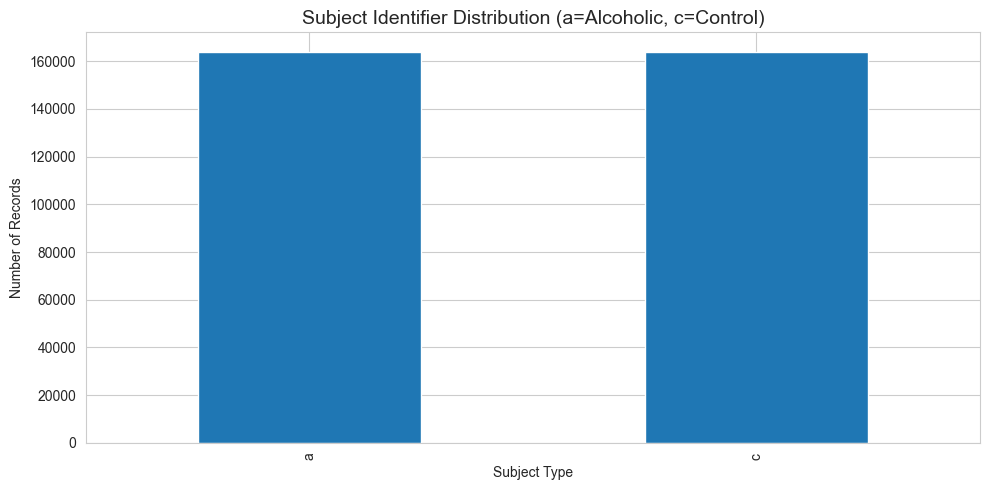


Class distribution (percentage):
subject identifier
a    50.0
c    50.0
Name: count, dtype: float64


In [10]:
# Class distribution (a = alcoholic, c = control)
plt.figure(figsize=(10, 5))
subject_counts.plot(kind='bar')
plt.title('Subject Identifier Distribution (a=Alcoholic, c=Control)', fontsize=14)
plt.xlabel('Subject Type')
plt.ylabel('Number of Records')
plt.tight_layout()
plt.show()

# Percentage
print("\nClass distribution (percentage):")
print((subject_counts / subject_counts.sum() * 100).round(2))


## 4. EEG Channel Analysis


In [11]:
# EEG channels
channels = sorted(combined_df['sensor position'].unique())
print(f"EEG Channels ({len(channels)} total):")
print(channels)

# Standard 10-20 system check
print("\nThis appears to be using the standard 10-20 EEG electrode placement system.")


EEG Channels (64 total):
['AF1', 'AF2', 'AF7', 'AF8', 'AFZ', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPZ', 'CZ', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCZ', 'FP1', 'FP2', 'FPZ', 'FT7', 'FT8', 'FZ', 'O1', 'O2', 'OZ', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PO1', 'PO2', 'PO7', 'PO8', 'POZ', 'PZ', 'T7', 'T8', 'TP7', 'TP8', 'X', 'Y', 'nd']

This appears to be using the standard 10-20 EEG electrode placement system.


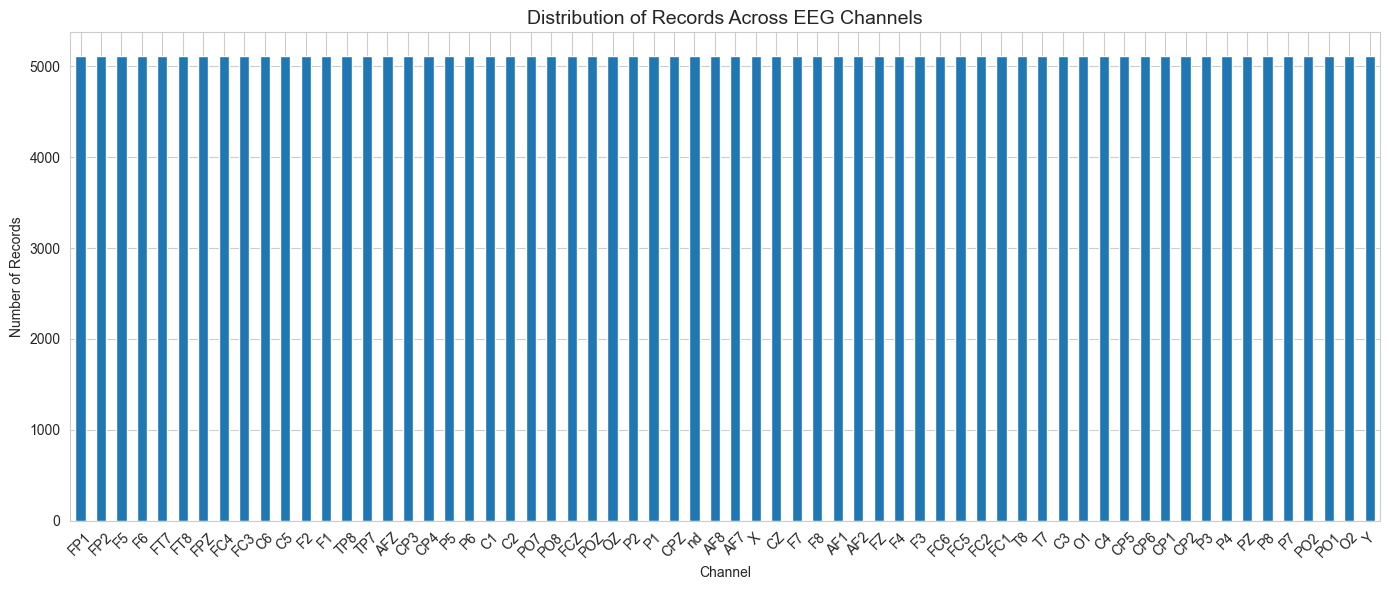

In [12]:
# Channel data distribution
channel_counts = combined_df['sensor position'].value_counts()
plt.figure(figsize=(14, 6))
channel_counts.plot(kind='bar')
plt.title('Distribution of Records Across EEG Channels', fontsize=14)
plt.xlabel('Channel')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 5. Signal Characteristics


Sensor Value Statistics:
count    327680.000000
mean         -1.435347
std           8.793241
min         -85.510000
25%          -5.992000
50%          -1.282000
75%           2.909000
max         278.687000
Name: sensor value, dtype: float64


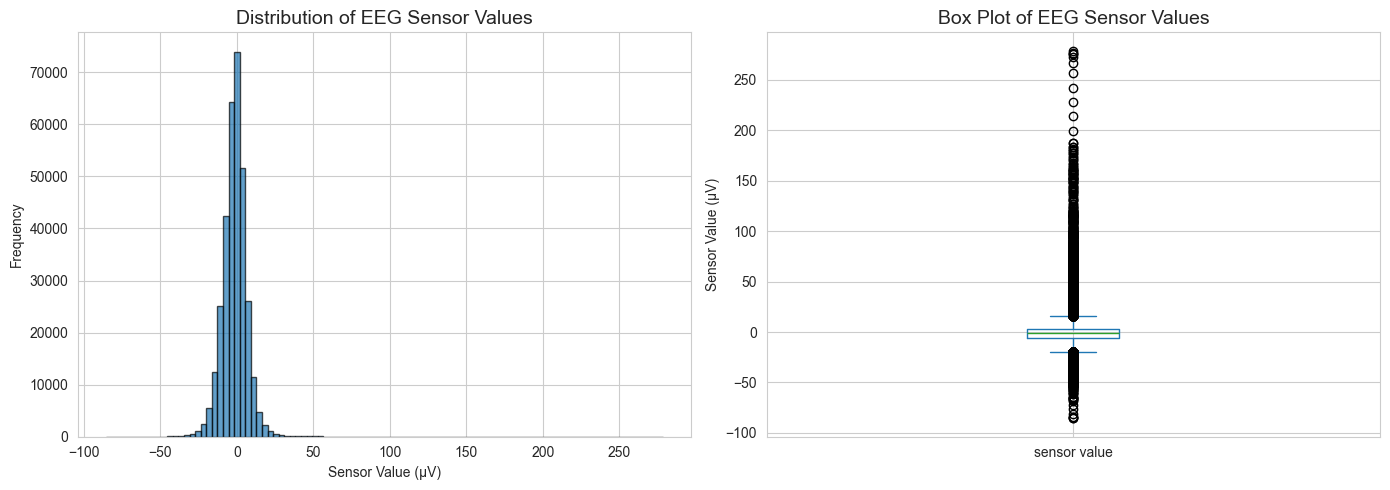

In [13]:
# Sensor value statistics
print("Sensor Value Statistics:")
print(combined_df['sensor value'].describe())

# Distribution of sensor values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(combined_df['sensor value'], bins=100, alpha=0.7, edgecolor='black')
plt.title('Distribution of EEG Sensor Values', fontsize=14)
plt.xlabel('Sensor Value (µV)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
combined_df['sensor value'].plot(kind='box')
plt.title('Box Plot of EEG Sensor Values', fontsize=14)
plt.ylabel('Sensor Value (µV)')

plt.tight_layout()
plt.show()


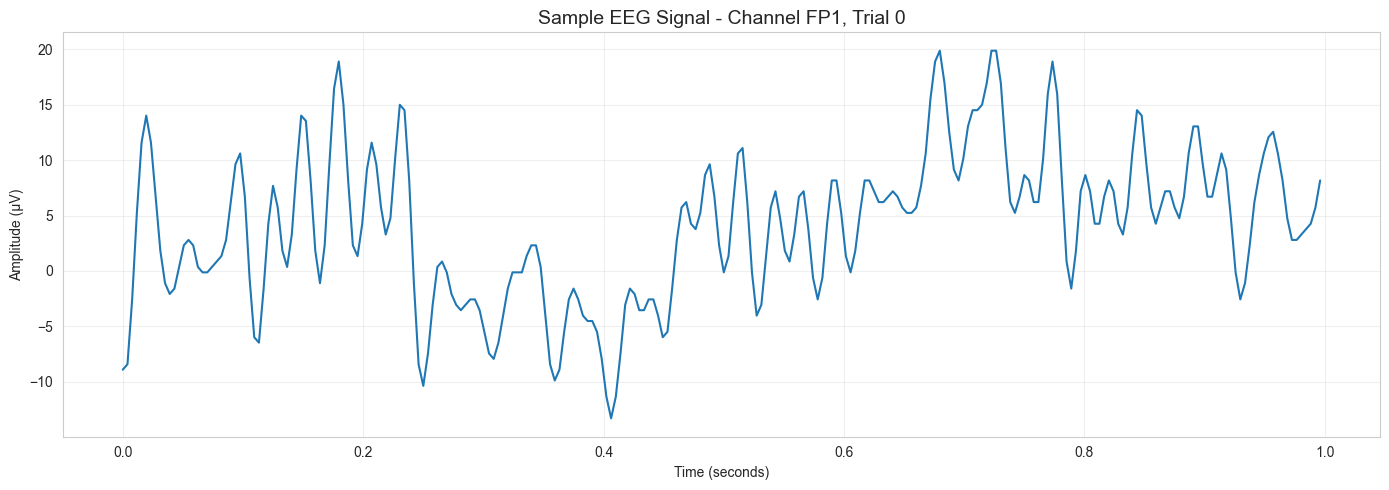

Signal duration: 1.00 seconds
Number of samples: 256


In [14]:
# Plot sample EEG signal from one channel and one trial
sample_channel = 'FP1'
sample_trial_data = combined_df[
    (combined_df['sensor position'] == sample_channel) & 
    (combined_df['trial number'] == 0) &
    (combined_df['file_id'] == 0)
].sort_values('sample num')

plt.figure(figsize=(14, 5))
plt.plot(sample_trial_data['time'], sample_trial_data['sensor value'])
plt.title(f'Sample EEG Signal - Channel {sample_channel}, Trial 0', fontsize=14)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (µV)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Signal duration: {sample_trial_data['time'].max():.2f} seconds")
print(f"Number of samples: {len(sample_trial_data)}")


In [15]:
# Trial information
print("Trial Information:")
print(f"Number of unique trials: {combined_df['trial number'].nunique()}")
print(f"Trial range: {combined_df['trial number'].min()} to {combined_df['trial number'].max()}")

trial_counts = combined_df['trial number'].value_counts().sort_index()
print(f"\nRecords per trial:")
print(trial_counts)


Trial Information:
Number of unique trials: 15
Trial range: 0 to 27

Records per trial:
trial number
0     32768
2     16384
13    16384
14    16384
15    16384
16    32768
17    32768
18    32768
19    16384
21    32768
23    16384
24    16384
25    16384
26    16384
27    16384
Name: count, dtype: int64


Matching Condition Distribution:
matching condition
S1 obj         163840
S2 nomatch,     81920
S2 match        81920
Name: count, dtype: int64


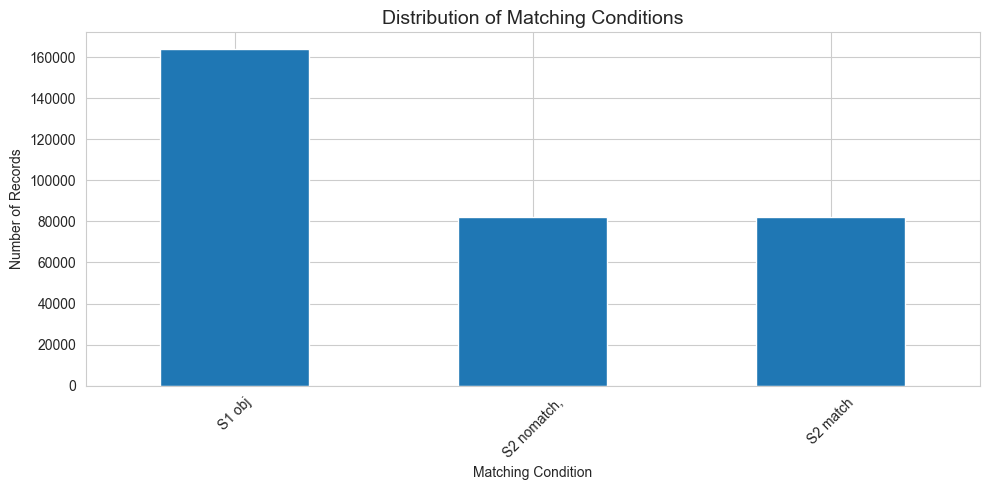

In [16]:
# Matching condition analysis
print("Matching Condition Distribution:")
condition_counts = combined_df['matching condition'].value_counts()
print(condition_counts)

plt.figure(figsize=(10, 5))
condition_counts.plot(kind='bar')
plt.title('Distribution of Matching Conditions', fontsize=14)
plt.xlabel('Matching Condition')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 7. Comprehensive Dataset Summary


In [17]:
# Get complete dataset statistics by loading all files metadata
all_subjects = set()
all_subject_identifiers = []
file_sizes = []

print("Analyzing all files...")
for i, file in enumerate(train_files):
    df_meta = pd.read_csv(file, nrows=100)  # Just read first 100 rows for metadata
    all_subjects.update(df_meta['name'].unique())
    all_subject_identifiers.extend(df_meta['subject identifier'].unique())
    file_sizes.append(file.stat().st_size)
    if (i + 1) % 100 == 0:
        print(f"  Processed {i + 1}/{len(train_files)} files...")

print(f"\nTotal unique subjects across all files: {len(all_subjects)}")
print(f"Average file size: {np.mean(file_sizes) / 1024:.2f} KB")
print(f"Total dataset size (train): {sum(file_sizes) / 1024**2:.2f} MB")


Analyzing all files...
  Processed 100/468 files...
  Processed 200/468 files...
  Processed 300/468 files...
  Processed 400/468 files...

Total unique subjects across all files: 16
Average file size: 953.33 KB
Total dataset size (train): 435.70 MB


In [18]:
# Subject type distribution across all files
from collections import Counter
subject_type_counts = Counter(all_subject_identifiers)
print("\nSubject Type Distribution Across All Training Files:")
for subject_type, count in sorted(subject_type_counts.items()):
    percentage = (count / sum(subject_type_counts.values())) * 100
    print(f"  {subject_type}: {count} occurrences ({percentage:.2f}%)")



Subject Type Distribution Across All Training Files:
  a: 235 occurrences (50.21%)
  c: 233 occurrences (49.79%)


In [19]:
# Save summary statistics
summary = {
    'total_train_files': len(train_files),
    'total_test_files': len(test_files),
    'num_channels': len(channels),
    'channels': channels,
    'sampling_rate': sampling_rate,
    'total_subjects': len(all_subjects),
    'subject_types': dict(subject_type_counts)
}

print("\n" + "="*50)
print("PHASE 1 COMPLETE - DATA COMPREHENSION SUMMARY")
print("="*50)
for key, value in summary.items():
    if key != 'channels':  # Don't print full channel list
        print(f"{key}: {value}")
print("="*50)



PHASE 1 COMPLETE - DATA COMPREHENSION SUMMARY
total_train_files: 468
total_test_files: 480
num_channels: 64
sampling_rate: 256.0
total_subjects: 16
subject_types: {'a': 235, 'c': 233}


In [20]:
import pandas as pd, glob
from collections import Counter

paths = glob.glob(str(TRAIN_PATH/'*.csv'))

# 1) 受试者与文件
meta = []
for p in paths:
    df = pd.read_csv(p, usecols=['name','subject identifier','matching condition'], nrows=5)
    meta.append((p, df['name'].iloc[0], df['subject identifier'].iloc[0]))
meta = pd.DataFrame(meta, columns=['file','name','subject'])
print('Files:', len(meta))
print('Unique participants:', meta['name'].nunique())
print(meta.groupby('subject')['name'].nunique())

# 2) 条件分布（全量）
cond = Counter()
for p in paths:
    d = pd.read_csv(p, usecols=['matching condition'])
    cond.update(d['matching condition'].value_counts().to_dict())
print('Matching condition counts:', dict(cond))

# 3) 通道完整性
miss = []
for p in paths[:50]:  # 全量可去掉 [:50]
    d = pd.read_csv(p, usecols=['sensor position'])
    chs = set(d['sensor position'].unique())
    if len(chs) < 64: miss.append((p, len(chs)))
print('Files missing channels:', len(miss))

# 4) trial 长度分布（抽样）
from collections import defaultdict
lengths = defaultdict(int)
for p in paths[:30]:
    d = pd.read_csv(p, usecols=['trial number','sensor position','sample num'])
    n_per = d.groupby(['trial number','sensor position'])['sample num'].nunique().reset_index()
    lengths.update(n_per['sample num'].value_counts().to_dict())
print('Per-channel trial lengths (sample counts):', dict(lengths))


Files: 468
Unique participants: 16
subject
a    8
c    8
Name: name, dtype: int64
Matching condition counts: {'S2 nomatch,': 2441216, 'S2 match': 2605056, 'S1 obj': 2621440}
Files missing channels: 0
Per-channel trial lengths (sample counts): {256: 64}
